In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [17]:
df = pd.read_json('./data.json', orient='records')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46035 entries, 0 to 46034
Data columns (total 6 columns):
_id              46035 non-null object
createdAt        46035 non-null object
customer         46035 non-null object
eventCategory    46035 non-null object
eventName        46035 non-null object
eventValue       46035 non-null object
dtypes: object(6)
memory usage: 2.5+ MB


In [3]:
df['eventCategory'].value_counts()

data-entry         20014
pageloads          20000
form-submission     6021
Name: eventCategory, dtype: int64

(array([  999.,     0.,  1887.,     0.,     0.,   800.,     0.,  2708.,
            0.,  3606.]),
 array([ 2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ]),
 <a list of 10 Patch objects>)

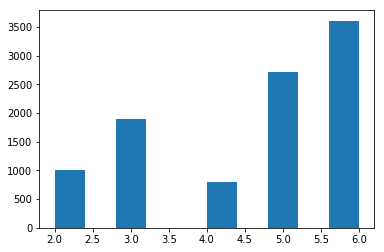

In [4]:
plt.hist(df['customer'].value_counts())

(array([ 0.96127009,  0.        ,  0.        ,  0.77088535,  0.        ,
         0.        ,  0.7667883 ,  0.        ,  0.        ,  0.8343896 ]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

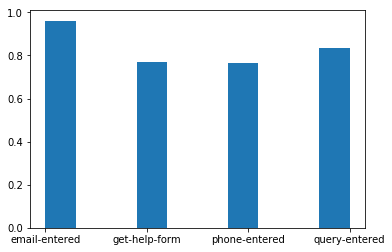

In [5]:
df_events = df[(df['eventCategory'] == 'data-entry') | (df['eventCategory'] == 'form-submission')]
plt.hist(df_events['eventName'], normed=True)

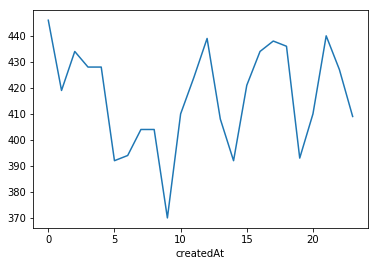

In [6]:
df_landing = df[df['eventName'] == 'page-loaded']
landing_idx = pd.DatetimeIndex(df_landing['createdAt'])
df_landing.groupby([landing_idx.hour])['createdAt'].count().plot()

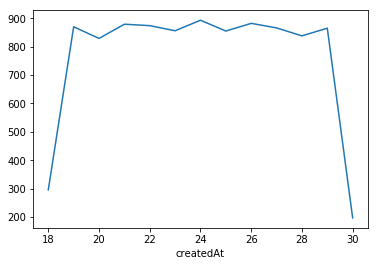

In [7]:
df_landing.groupby([landing_idx.day])['createdAt'].count().plot()

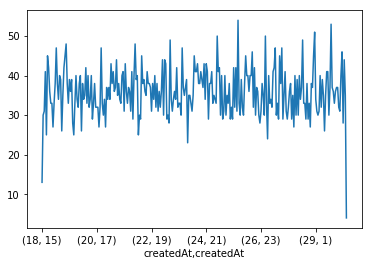

In [8]:
df_landing.groupby([landing_idx.day, landing_idx.hour])['createdAt'].count().plot()

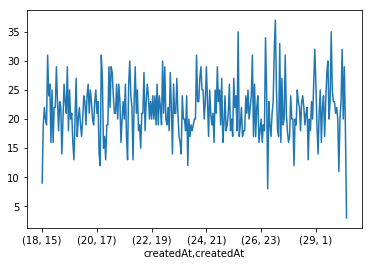

In [9]:
def plot_event_dist(event_name):
    df_times = df[df['eventName'] == event_name]
    times_idx = pd.DatetimeIndex(df_times['createdAt'])
    df_times.groupby([times_idx.day, times_idx.hour])['createdAt'].count().plot()
    
plot_event_dist('get-help-form')

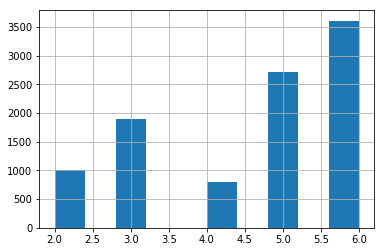

In [10]:
df.groupby('customer')['eventName'].count().hist()

In [11]:
df[df['eventName'] == 'get-help-form']['_id'].count()

6021

In [12]:
df[df['eventName'] == 'email-entered']['eventValue'].count()

7508

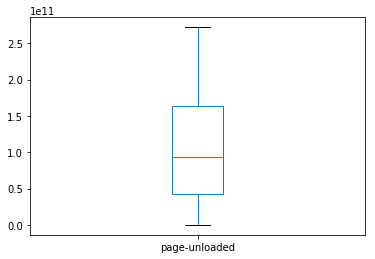

In [14]:
parse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ')
pivot_df = df[df['eventCategory'] == 'pageloads'].pivot(index='customer', columns='eventName', values='createdAt')
pivot_df.loc[:, 'page-unloaded'] = pivot_df.loc[:, 'page-unloaded'].apply(parse)
pivot_df.loc[:, 'page-loaded'] = pivot_df.loc[:, 'page-loaded'].apply(parse)
pivot_df.loc[:, 'page-unloaded'] = pivot_df.loc[:, 'page-unloaded'] - pivot_df.loc[:, 'page-loaded']
pivot_df.loc[:, 'page-unloaded'].plot(kind='box')

In [16]:
pg_unloaded = pivot_df.loc[:, 'page-unloaded'].apply(lambda x: x.seconds)
pg_unloaded.mean()

104.6191

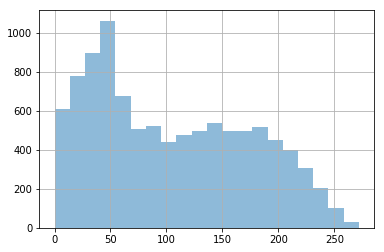

In [15]:
pg_unloaded.hist(bins=20, alpha=0.5)